<font size = 40 color=darkgreen>Sentiment Analysis</font><br>
Sentiment analysis is the process of understanding the opinion of an author about a subject. This is comprised of 3 elements:
1. The opinion (*Positive - Neutral - Negative*) and/or emotion (*Joy - Surprise - Anger - Disgust*) 
2. The subject being talked about
3. Opinion holder<br>

Sentiment analysis is used to give insight how people are talking about a subject.<BR> 
Some common areas of application are:
- Social media monitoring
- Brand monitoring
- Customer service
- Product analysis
- Market research and analysis<BR>

<font size=5 color=darkgreen>Movie Review Analysis</font><br>
This project will focus on analyzing the sentiment of moview reviews from the IMDB database. <br>
The data source for this project can be found on Kaggle:<br> https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews#*<br><br>
**Steps:**<br>
1. Importing libraries and reading data
2. EDA 

# <font color=teal>Import data</font>

In [74]:
# Data manipulation
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk import word_tokenize
from langdetect import detect_langs


#ML libraries
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Options for pandas
pd.options.display.max_columns
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
#import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo
pio.renderers.default = 'iframe'

20

In [2]:
#Git
source = 'https://github.com/michael-william/Sentiment-analysis/raw/master/IMDB_Dataset.csv'
df = pd.read_csv(source)

# <font color=teal>EDA</font>

In [3]:
# Creating copy of main df
data = df

In [4]:
# Viewing first 2 lines of the datafram
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.sentiment.value_counts()/len(data)*100

negative    50.0
positive    50.0
Name: sentiment, dtype: float64

In [6]:
# Reviewing details of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


***There are 50K reviews with an even split of positive and negative reviews and no nulls***

In [7]:
languages = []

for row in range(len(data.review)):
                 languages.append(detect_langs(data.review.iloc[row]))

In [8]:
lang_str=[str(item[0]).split(':')[0] for item in languages]
lang_score=[round(float(str(item[0]).split(':')[1]),6) for item in languages]


In [9]:
data['language'] = lang_str
data['lang_assurance'] = lang_score

In [10]:
print('There are {} languages detected in this data set.'.format(data.language.nunique()))
data.language.value_counts()

There are 2 languages detected in this data set.


en    49999
id        1
Name: language, dtype: int64

In [11]:
# inspecting non-english reviews
data[data.language!='en']['review']

45315    .....whoops - looks like it's gonna cost you a...
Name: review, dtype: object

In [12]:
# assessing overall language assurance score
data[data.language=='en']['lang_assurance'].describe()

count    49999.000000
mean         0.999977
std          0.002303
min          0.571427
25%          0.999996
50%          0.999997
75%          0.999998
max          1.000000
Name: lang_assurance, dtype: float64

In [13]:
# assessing the length of reviews
length_of_reviews = data.review.str.len()
max_review = max(length_of_reviews)
min_review = min(length_of_reviews)
avg_review = np.mean(length_of_reviews)

print('The longest reviews is {} words'.format(max_review))
print('The shortest reviews is {} words'.format(min_review))
print('The average review length is {} words'.format(np.ceil(avg_review).astype('int')))

The longest reviews is 13704 words
The shortest reviews is 32 words
The average review length is 1310 words


> ## <font color=brown>Example word clouds for average length reviews
</font>

In [14]:
# adding review length to dataframe
data['review_len'] = length_of_reviews
data[data.review_len == np.ceil(avg_review).astype('int')].head(2)

,review,sentiment,language,lang_assurance,review_len
2498,This film breeches the fine line between satir...,negative,en,0.999996,1310
7470,Delightful film directed by some of the best d...,positive,en,0.999996,1310


In [15]:
# initiating and updating stop words with content specific words
my_stopwords = ENGLISH_STOP_WORDS.union(['film', 'movie', 'br'])

In [16]:
# cheching for stop words include words with first letter capitalized
upper_count=0

for x in list(my_stopwords):
    value = x[0].isupper() 
    upper_count += value
print('There are {} words in my_stopwords that start with a capital letter'.format(upper_count))

There are 0 words in my_stopwords that start with a capital letter


In [17]:
# capitalizing all words in my_stopwords 
capital_stopwords = []
for x in my_stopwords:
    capital_stopwords.append(x.capitalize())

# updating my_stopwords list with capitalized versions
my_stopwords = my_stopwords.union(capital_stopwords)

# checking number of capitalized words in my_stopwords
upper_count = 0
for x in list(my_stopwords):
    value = np.sum(x[0].isupper()) 
    upper_count += value
print('There are {} words in my_stopwords that start with a capital letter'.format(upper_count))

There are 321 words in my_stopwords that start with a capital letter


Text(0.5, 1.0, 'Positve Word Cloud')

(-0.5, 399.5, 199.5, -0.5)

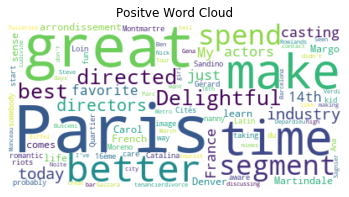

In [18]:
# creating positive word cloud 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(data.review.iloc[7470])

# Display the generated wordcloud image
_=plt.imshow(my_cloud, interpolation='bilinear') 
plt.title('Positve Word Cloud')
plt.axis("off")

Text(0.5, 1.0, 'Negative Word Cloud')

(-0.5, 399.5, 199.5, -0.5)

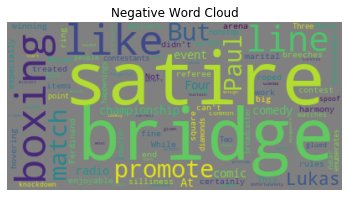

In [19]:
# creating positive word cloud 
my_cloud = WordCloud(background_color='grey', stopwords=my_stopwords).generate(data.review.iloc[2498])

# Display the generated wordcloud image
_=plt.imshow(my_cloud, interpolation='bilinear') 
plt.title('Negative Word Cloud')
plt.axis("off")

> ## <font color=brown>Analyzing polarity and subjectivity
</font><br>
- Polarity is number in the range of [-100,100] where 100 means a positive statement and -100 means a negative statement. 
- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is a number which lies in the range of [0,100] where 100 is a subjective statement and -100 is a objective statement.

In [20]:
# Create a textblob object for positive review  
blob_positive = TextBlob(data.review.iloc[7470])

# Print out the sentiment for positive review
print('The polarity is {}% for the positive review'.format(np.round(blob_positive.sentiment[0],4)*100))
print('The subjectivity is {}% for the positive review'.format(np.round(blob_positive.sentiment[1],4)*100))


The polarity is 43.0% for the positive review
The subjectivity is 56.67% for the positive review


*Polarity for the positive review correlates well with the positive score*

In [21]:
# Create a textblob object for negative review  
blob_negative = TextBlob(data.review.iloc[2498])

# Print out the sentiment for negative review
print('The polarity is {}% for the negative review'.format(np.round(blob_negative.sentiment[0],4)*100))
print('The subjectivity is {}% for the negative review'.format(np.round(blob_negative.sentiment[1],4)*100))


The polarity is 14.360000000000001% for the negative review
The subjectivity is 45.53% for the negative review


*The polarity of the review correlates with the negative score*

In [22]:
# creating functions to add polarity and subjectivity scores
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment[0]*100

def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment[1]*100

In [23]:
data['polarity'] = data.review.apply(polarity)

In [24]:
data['subjectivity'] = data.review.apply(subjectivity)

In [25]:
data.polarity.describe()

count    50000.000000
mean        10.339725
std         16.328419
min       -100.000000
25%          0.414764
50%         10.453704
75%         20.330509
max        100.000000
Name: polarity, dtype: float64

In [44]:
# organizing data for plotly visualization
hist_1 = go.Histogram(
    x=data['polarity'],
    opacity = 0.75,
    name='Polarity')

hist_2 = go.Histogram(
    x=data['subjectivity'],
    opacity = 0.75,
    name='Subjectivity')

hist_data = [hist_1, hist_2]

In [49]:
# completing layout of plotly visualization and displaying the figure
layout = go.Layout(
    title='Polarity vs Subjectivity',
    barmode='overlay')

fig = go.Figure(data=hist_data, layout=layout)
pyo.plot(fig, filename='Polarity vs Subjectivity.html')
fig.show()

'Polarity vs Subjectivity.html'

***The data for polarity and subjectivity is normally distributed***<br>
***Subjectivity looks like its is less spread, but the min is 0 vs -1***

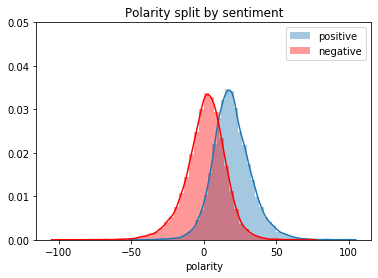

In [52]:
_=plt.title('Polarity split by sentiment')
_=sns.distplot(data.polarity[data.sentiment=='positive'],label='positive')
_=sns.distplot(data.polarity[data.sentiment=='negative'], color='red', label='negative')
_=plt.legend()
_=plt.ylim(0,0.05)

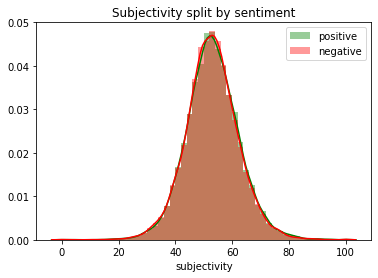

In [53]:
_=plt.title('Subjectivity split by sentiment')
_=sns.distplot(data.subjectivity[data.sentiment=='positive'],color='green',label='positive')
_=sns.distplot(data.subjectivity[data.sentiment=='negative'], color='red', label='negative')
_=plt.legend()
_=plt.ylim(0,0.05)

***Negative reviews seem to be more neutral where positive reviews seem to be more positive***<br>
***There seem to be almost no difference in subjectivity between positive and negative reviews***<br>
***Would like to know if there's any change by removing stop words***

> ## <font color=brown>Advanced processing of reviews for better analysis<br>
- Exploration of of the 'review' column shows plenty of characters and jargon that is hard for the machine to interpret.<br> 
- Further processing of the 'review' column is needed by removing stop words and only including recognized English words

In [54]:
# adding new column for reviews with stop words removed
new_review = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (my_stopwords)]))

In [55]:
data['new_review'] = new_review

In [87]:
# tokenizing new_review column
tokens = [nltk.wordpunct_tokenize(sentence) for sentence in data.new_review]

In [97]:
# adding tokens as a column from the new_review column in the data frame
data['tokenized'] = tokens

In [76]:
# Downloading corpus of words from nltk to use as an English word bank
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/michaelcondon/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [105]:
test = [w for w in data.tokenized[1] if w in words]

In [123]:
# function to only select words that are present in our English word bank
def eng_words(item):
    e_words = " ".join(w for w in item if w.lower() in words)
    return e_words
        

In [124]:
# creating a new column of only English words from the tokenized using function
data['eng_review'] = data.tokenized.apply(eng_words)

In [126]:
# recalculating for polarity on new_review and eng_review
data['new_polarity'] = data.new_review.apply(polarity)
data['eng_polarity'] = data.eng_review.apply(polarity)

In [127]:
# recalculating for subjectivity on new_review and eng_review
data['new_subjectivity'] = data.new_review.apply(subjectivity)
data['eng_subjectivity'] = data.eng_review.apply(subjectivity)

In [129]:
# organizing data for plotly visualization and comparison to new columns
hist_3 = go.Histogram(
    x=data['new_polarity'],
    opacity = 0.75,
    name='New Polarity')

hist_4 = go.Histogram(
    x=data['new_subjectivity'],
    opacity = 0.75,
    name='New Subjectivity')

hist_5 = go.Histogram(
    x=data['eng_polarity'],
    opacity = 0.75,
    name='Eng Polarity')

hist_6 = go.Histogram(
    x=data['eng_subjectivity'],
    opacity = 0.75,
    name='Eng Subjectivity')

hist_data = [hist_1, hist_3, hist_5, hist_2, hist_4, hist_6 ]

In [130]:
# completing layout of plotly visualization and displaying the figure
layout = go.Layout(
    title='Polarity vs Subjectivity (Old, New, Eng)',
    barmode='overlay')

fig = go.Figure(data=hist_data, layout=layout)
pyo.plot(fig, filename='Polarity vs Subjectivity(old, new, eng).html')
fig.show()

'Polarity vs Subjectivity(old, new, eng).html'

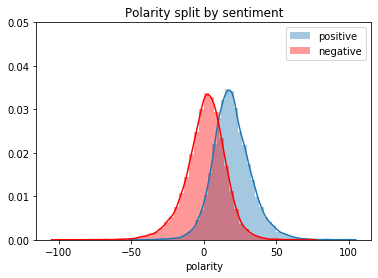

In [65]:
_=plt.title('Polarity split by sentiment')
_=sns.distplot(data.polarity[data.sentiment=='positive'],label='positive')
_=sns.distplot(data.polarity[data.sentiment=='negative'], color='red', label='negative')
_=plt.ylim(0,0.05)
_=plt.legend()

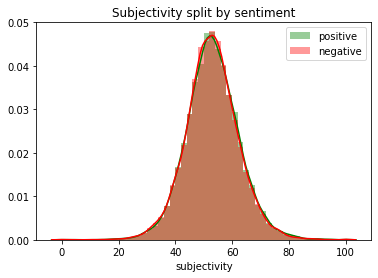

In [66]:
_=plt.title('Subjectivity split by sentiment')
_=sns.distplot(data.subjectivity[data.sentiment=='positive'],color='green',label='positive')
_=sns.distplot(data.subjectivity[data.sentiment=='negative'], color='red', label='negative')
_=plt.legend()
_=plt.ylim(0,0.05)

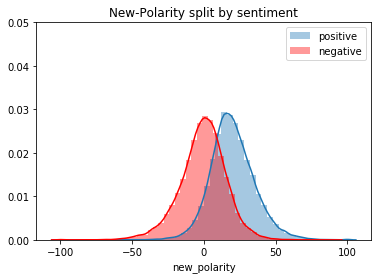

In [67]:
_=plt.title('New-Polarity split by sentiment')
_=sns.distplot(data.new_polarity[data.sentiment=='positive'],label='positive')
_=sns.distplot(data.new_polarity[data.sentiment=='negative'], color='red', label='negative')
_=plt.legend()
_=plt.ylim(0,0.05)

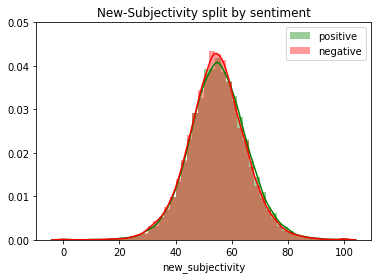

In [68]:
_=plt.title('New-Subjectivity split by sentiment')
_=sns.distplot(data.new_subjectivity[data.sentiment=='positive'],color='green',label='positive')
_=sns.distplot(data.new_subjectivity[data.sentiment=='negative'], color='red', label='negative')
_=plt.legend()
_=plt.ylim(0,0.05)

***Distribution peaks are a bit more flat for the new_review and eng_review columns, but no real change in polarity or subjectivity by removing stop words and only accounting for English words***